In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering

data = arff.loadarff('banknote_ver.arff')

df = pd.DataFrame(data[0])
df

,V1,V2,V3,V4,Class
0,3.621600,8.66610,-2.807300,-0.446990,b'1'
1,4.545900,8.16740,-2.458600,-1.462100,b'1'
2,3.866000,-2.63830,1.924200,0.106450,b'1'
3,3.456600,9.52280,-4.011200,-3.594400,b'1'
4,0.329240,-4.45520,4.571800,-0.988800,b'1'
5,4.368400,9.67180,-3.960600,-3.162500,b'1'
6,3.591200,3.01290,0.728880,0.564210,b'1'
7,2.092200,-6.81000,8.463600,-0.602160,b'1'
8,3.203200,5.75880,-0.753450,-0.612510,b'1'
9,1.535600,9.17720,-2.271800,-0.735350,b'1'


In [2]:
def getCSVFromArff(banknote_ver):
	with open(banknote_ver + '.arff', 'r') as fin:
		data = fin.read().splitlines(True)
	i = 0
	cols = []
	for line in data:
		line = line.lower()
		if ('@data' in line):
			i+= 1
			break
		else:
			#print line
			i+= 1
			if (line.startswith('@attribute')):
				if('{' in line):
					cols.append(line[11:line.index('{')-1])
				else:
					cols.append(line[11:line.index(' ', 11)])
	headers = ",".join(cols)
	with open(banknote_ver + '.csv', 'w') as fout:
		fout.write(headers)
		fout.write('\n')
		fout.writelines(data[i:])

getCSVFromArff("banknote_ver")				# enter filename here (without extension)

In [3]:
df = pd.read_csv('banknote_ver.csv')
df

,v1,v2,v3,v4,class
0,3.621600,8.66610,-2.807300,-0.446990,1
1,4.545900,8.16740,-2.458600,-1.462100,1
2,3.866000,-2.63830,1.924200,0.106450,1
3,3.456600,9.52280,-4.011200,-3.594400,1
4,0.329240,-4.45520,4.571800,-0.988800,1
5,4.368400,9.67180,-3.960600,-3.162500,1
6,3.591200,3.01290,0.728880,0.564210,1
7,2.092200,-6.81000,8.463600,-0.602160,1
8,3.203200,5.75880,-0.753450,-0.612510,1
9,1.535600,9.17720,-2.271800,-0.735350,1


In [4]:
#Select the V1 and V2 columns
X=df.iloc[:, [0,1]].values
X

array([[  3.6216 ,   8.6661 ],
       [  4.5459 ,   8.1674 ],
       [  3.866  ,  -2.6383 ],
       ...,
       [ -3.7503 , -13.4586 ],
       [ -3.5637 ,  -8.3827 ],
       [ -2.5419 ,  -0.65804]])

In [5]:
#5 According to the Elbow graph we deterrmine the clusters number as.
#Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0)

In [6]:
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. 
#The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
cluster = kmeans.fit_predict(X)
cluster

#Put the assigned labels to the original dataset
df['KMeans'] = kmeans.labels_

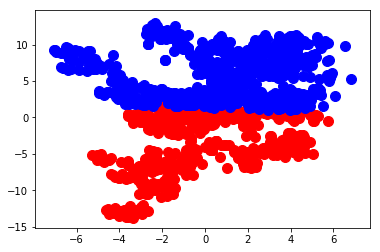

In [7]:
#6 Visualising the clusters
plt.scatter(X[cluster==0, 0], X[cluster==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[cluster==1, 0], X[cluster==1, 1], s=100, c='blue', label ='Cluster 2')

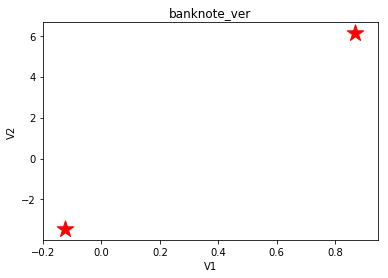

In [8]:
#Plot the centroid. This time we're going to use the cluster centres #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='r', marker = '*', label = 'Centroids')
plt.title('banknote_ver')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

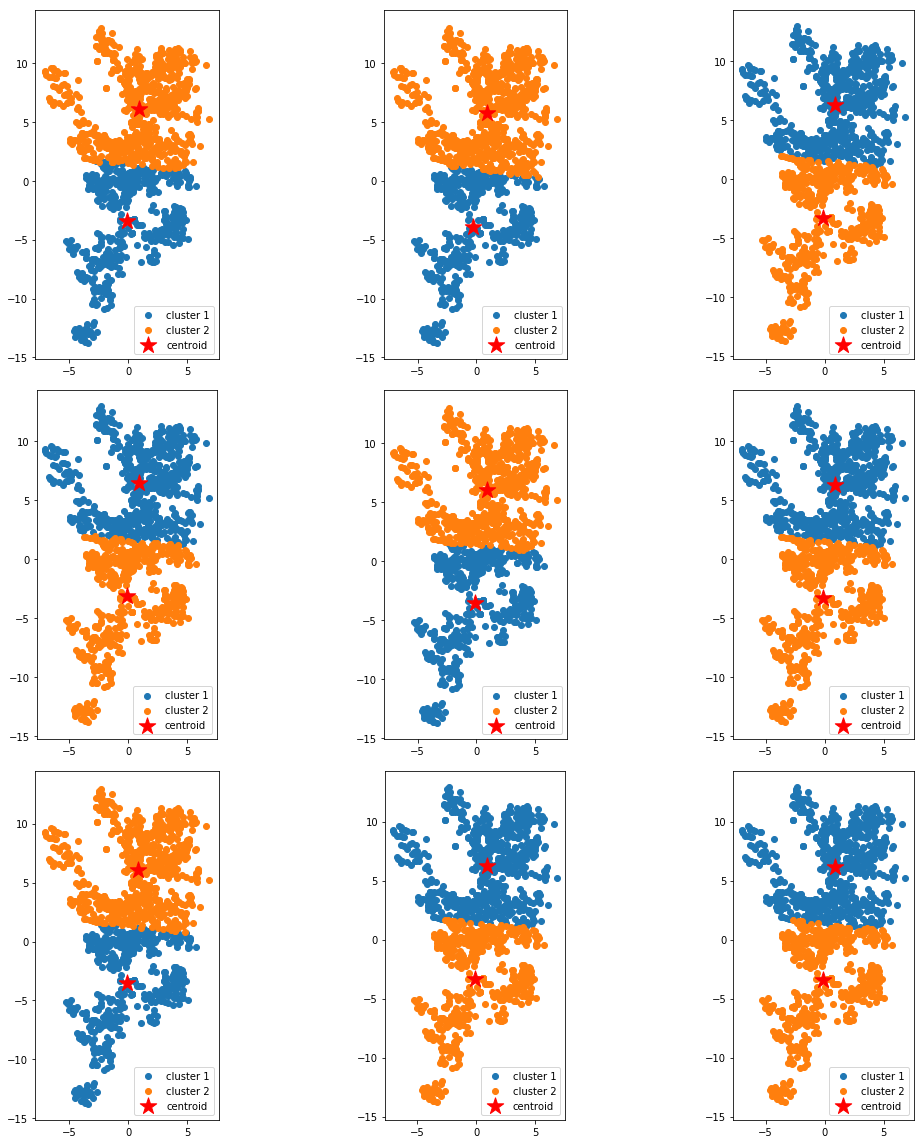

In [11]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)

for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2,
                max_iter=3)
    km.fit(X)
    centroids = km.cluster_centers_
    
    ax[i].scatter(X[km.labels_ == 0, 0], X[km.labels_ == 0, 1],
                   label='cluster 1')
    ax[i].scatter(X[km.labels_ == 1, 0], X[km.labels_ == 1, 1],
                   label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].legend(loc='lower right')
    ax[i].set_aspect('equal')
plt.tight_layout();

In [20]:
df.groupby('KMeans').describe()
#print(df.to_string())

            v1         v2         v3        v4  class  KMeans
0     3.621600   8.666100  -2.807300 -0.446990      1       1
1     4.545900   8.167400  -2.458600 -1.462100      1       1
2     3.866000  -2.638300   1.924200  0.106450      1       0
3     3.456600   9.522800  -4.011200 -3.594400      1       1
4     0.329240  -4.455200   4.571800 -0.988800      1       0
5     4.368400   9.671800  -3.960600 -3.162500      1       1
6     3.591200   3.012900   0.728880  0.564210      1       1
7     2.092200  -6.810000   8.463600 -0.602160      1       0
8     3.203200   5.758800  -0.753450 -0.612510      1       1
9     1.535600   9.177200  -2.271800 -0.735350      1       1
10    1.224700   8.777900  -2.213500 -0.806470      1       1
11    3.989900  -2.706600   2.394600  0.862910      1       0
12    1.899300   7.662500   0.153940 -3.110800      1       1
13   -1.576800  10.843000   2.546200 -2.936200      1       1
14    3.404000   8.726100  -2.991500 -0.572420      1       1
15    4.

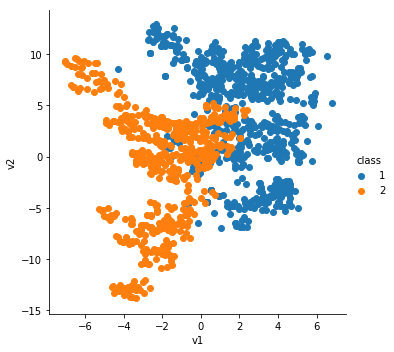

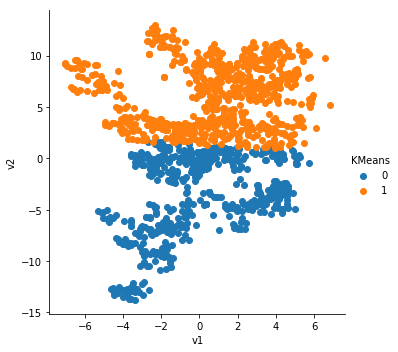

In [18]:
import seaborn as sns

g = sns.FacetGrid(df, hue = 'class', height = 5)
g.map(plt.scatter, 'v1','v2')
g.add_legend()
#Class(target).Presumably 1 for genuine and 2 for forged
# hue parameter determines which column be used for colour encoding

g = sns.FacetGrid(df, hue = 'KMeans', height = 5)
g.map(plt.scatter, 'v1','v2')
g.add_legend()

In [44]:
#df["KMeans"] = df["KMeans"].map({0:1,1:2})
df["v2"][1]
df.v1[1]

4.5459